In [147]:
import os
os.getcwd()

'/Users/chidam'

In [148]:
import pandas as pd
df=pd.read_csv('/Users/chidam/Desktop/housing_prices_kaggle_train.csv')

In [149]:
df.drop(df.index[[523,691,1182,1298, 1169]], inplace=True)
df=df.reset_index(drop=True)#here drop=True means to drop the alreading existing index column

In [150]:
df['MSZoning'].value_counts()

RL         1146
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [151]:
df['BedroomAbvGr'].value_counts()

3    802
2    358
4    210
1     50
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64

In [152]:
df['Functional'].value_counts()

Typ     1355
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

In [153]:
df['BsmtUnfSF'].value_counts()

0       118
728       9
384       8
572       7
600       7
440       6
625       6
300       6
280       6
672       6
270       6
162       5
108       5
490       5
390       5
80        5
326       5
816       5
698       5
319       5
264       5
216       5
410       5
638       4
768       4
780       4
660       4
420       4
840       4
556       4
       ... 
707       1
705       1
701       1
693       1
721       1
692       1
691       1
690       1
1515      1
680       1
1528      1
717       1
722       1
758       1
739       1
752       1
750       1
1497      1
744       1
741       1
740       1
735       1
724       1
734       1
733       1
731       1
730       1
726       1
725       1
2046      1
Name: BsmtUnfSF, Length: 778, dtype: int64

In [154]:
df['BsmtFullBath'].value_counts()

0    855
1    585
2     14
3      1
Name: BsmtFullBath, dtype: int64

In [155]:
import calendar
df['MoSold'] = df['MoSold'].apply(lambda x: calendar.month_abbr[x])





In [156]:
df['Season']=df['MoSold'].copy()

In [157]:
df['Season'].isnull().any()

False

In [158]:
#To group months according to season: summer, winter, autumn, and spring

df.loc[(df['MoSold']=='Jun') | (df['MoSold']=='Jul') | (df['MoSold']=='Aug'),'Season']='Summer'
df.loc[(df['MoSold']=='Mar') | (df['MoSold']=='Apr') | (df['MoSold']=='May'),'Season']= 'Spring'
df.loc[(df['MoSold']=='Sep') | (df['MoSold']=='Oct') | (df['MoSold']=='Nov'),'Season']='Autumn'
df.loc[(df['MoSold']=='Jan') | (df['MoSold']=='Feb') | (df['MoSold']=='Dec'),'Season']='Winter'



In [159]:
df['Season'].isnull().any()

False

In [160]:
#To group the neighborhoods according to maximum SalePrice
def neighborhood_convert(d):
    from collections import defaultdict
    d2=defaultdict(list)
    for k, v in d.items():
        if v<=200000:
            d2['g1'].append(k)     
        elif (v>200000) & (v<=300000):
            d2['g2'].append(k)
        elif (v>300000) & (v<=400000):
            d2['g3'].append(k)
        else:
            d2['g4'].append(k)
            
    return d2
            
            

In [161]:
neighborhood_convert(dict(df.groupby('Neighborhood')['SalePrice'].max()))

defaultdict(list,
            {'g1': ['BrDale',
              'IDOTRR',
              'NPkVill',
              'Sawyer',
              'Blueste',
              'MeadowV',
              'SWISU'],
             'g2': ['BrkSide', 'Mitchel', 'NWAmes', 'Blmngtn'],
             'g3': ['Veenker',
              'Crawfor',
              'Timber',
              'NAmes',
              'Edwards',
              'ClearCr',
              'SawyerW',
              'Gilbert'],
             'g4': ['StoneBr',
              'CollgCr',
              'NoRidge',
              'Somerst',
              'NridgHt',
              'OldTown']})

In [162]:
df.loc[(df['Neighborhood']=='IDOTRR'), 'Neighborhood']='g'

df.loc[(df['Neighborhood']=='MeadowV')|(df['Neighborhood']=='SWISU')|(df['Neighborhood']=='BrDale')|(df['Neighborhood']=='NPkVill')|(df['Neighborhood']=='Blueste')|(df['Neighborhood']=='Sawyer'),'Neighborhood']='g' 
    
df.loc[(df['Neighborhood']=='Blmngtn')|(df['Neighborhood']=='Mitchel')|(df['Neighborhood']=='BrkSide')|(df['Neighborhood']=='NWAmes'),'Neighborhood']='h' 

df.loc[(df['Neighborhood']=='Veenker')|(df['Neighborhood']=='SawyerW')|(df['Neighborhood']=='ClearCr')|(df['Neighborhood']=='Edwards')|(df['Neighborhood']=='Gilbert')|(df['Neighborhood']=='NAmes')|(df['Neighborhood']=='Timber')|(df['Neighborhood']=='Crawfor'),'Neighborhood']='i' 

df.loc[(df['Neighborhood']=='NoRidge')|(df['Neighborhood']=='NridgHt')|(df['Neighborhood']=='StoneBr')|(df['Neighborhood']=='OldTown')|(df['Neighborhood']=='Somerst')|(df['Neighborhood']=='CollgCr'),'Neighborhood']='j' 
         

In [163]:
df['Neighborhood'].unique()

array(['j', 'i', 'h', 'g'], dtype=object)

In [164]:
#Filling in the missing values in GarageType with BuiltIn as it is a popular choice but there are not many values from 
#that category
df.GarageType = df.GarageType.fillna('BuiltIn')

In [165]:
#BsmtQual

df['BsmtQual'].value_counts(dropna=False)

TA     649
Gd     618
Ex     116
NaN     37
Fa      35
Name: BsmtQual, dtype: int64

In [166]:
df.loc[df['BsmtQual'].isnull(), 'BsmtQual'] = 'missing'

In [167]:
df.groupby('BsmtQual')['SalePrice'].median()

BsmtQual
Ex         317500
Fa         112000
Gd         192070
TA         135500
missing    101800
Name: SalePrice, dtype: int64

In [168]:
# Because the median SalePrice for the missing category is 101800 and is close to Fair median SalePrice I am converting missing 
# to Fa


df.loc[df['BsmtQual']=='missing', 'BsmtQual'] = 'Fa'




In [169]:
#To get value_counts() of 'MasVnrType'

df['MasVnrType'].value_counts(dropna=False)
        

None       863
BrkFace    443
Stone      126
BrkCmn      15
NaN          8
Name: MasVnrType, dtype: int64

In [170]:
df.loc[df['MasVnrType'].isnull(), 'MasVnrType'] = 'Stone'

In [171]:
def convert_garagetype(d, x, y, col_name):
    import pandas as pd
    for ele in range(len(x)):
        if x[ele]=='Detchd':
            if x[ele] in y:
                x[ele]=-y[x[ele]]
                
        else:
            if x[ele] in y:
                x[ele]=y[x[ele]]
        
    d.drop(col_name, axis=1)
    d[col_name]=pd.Series(x)
    return d[col_name].head()

convert_garagetype(df, df['GarageType'].tolist(), dict(df['GarageType'].value_counts()/len(df)), 'GarageType')

0    0.595189
1    0.595189
2    0.595189
3   -0.265979
4    0.595189
Name: GarageType, dtype: float64

In [172]:
df['GarageType'].isnull().any()

False

In [173]:
#Convert 'MasVnrType' into numerical: None means no veneer type at all

def convert_MasVnrType(d, x, y, col_name):
    import pandas as pd
    for ele in range(len(x)):
        if x[ele]=='None':
            if x[ele] in y:
                x[ele]=-y[x[ele]]
                
        else:
            if x[ele] in y:
                x[ele]=y[x[ele]]
        
    d.drop(col_name, axis=1)
    d[col_name]=pd.Series(x)
    return d[col_name].head()

convert_MasVnrType(df, df['MasVnrType'].tolist(), dict(df['MasVnrType'].value_counts()/len(df)), 'MasVnrType')

0    0.304467
1   -0.593127
2    0.304467
3   -0.593127
4    0.304467
Name: MasVnrType, dtype: float64

In [174]:
df['MasVnrType'].isnull().any()

False

In [175]:
#Don't include SaleType instead include SaleCondition
def convert_SaleCondition(d, x, y, col_name):
    import pandas as pd
    for ele in range(len(x)):
        if x[ele]=='Abnorml':
            if x[ele] in y:
                x[ele]=-y[x[ele]]
                
        else:
            if x[ele] in y:
                x[ele]=y[x[ele]]
        
    d.drop(col_name, axis=1)
    d[col_name]=pd.Series(x)
    return d[col_name].head()

convert_SaleCondition(df, df['SaleCondition'].tolist(), dict(df['SaleCondition'].value_counts()/len(df)), 'SaleCondition')

0    0.821993
1    0.821993
2    0.821993
3   -0.068729
4    0.821993
Name: SaleCondition, dtype: float64

In [176]:
#To find the age of a building by subtracting 'YearBuilt' from 'YrSold' 
df['Age_building']=(df['YrSold']-df['YearBuilt'])

In [177]:
#To find the number of years since a building had been remodeled before the time it was sold by subtracting 'YearRemodAdd' from
#'YrSold'
df['Since_remodeled']=(df['YrSold']-df['YearRemodAdd'])




In [178]:
#Filling in the missing values in 'GarageYrBlt'
df.GarageYrBlt = df.GarageYrBlt.fillna(df['GarageYrBlt'].median())

In [179]:
#GarageYrBlt Vs. SalePrice It is possible to get the info on whether the garage is a old one or recently built and thereby
#check how that had affected the SalePrice

#To find the age of a building by subtracting 'YearBuilt' from 'YrSold' 
df['Age_garage']=(df['YrSold']-df['GarageYrBlt'])

In [180]:
df['KitchenAbvGr'].value_counts()

1    1387
2      65
3       2
0       1
Name: KitchenAbvGr, dtype: int64

In [181]:
df['MSZoning'].value_counts()

RL         1146
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [182]:
def convert_MSzoning(d, x, y, col_name):
    import pandas as pd
    for ele in range(len(x)):
        if (x[ele]=='FV') | (x[ele]=='C (all)'):
            if x[ele] in y:
                x[ele]=-y[x[ele]]
                
        else:
            if x[ele] in y:
                x[ele]=y[x[ele]]
        
    d.drop(col_name, axis=1)
    d[col_name]=pd.Series(x)
    return d[col_name].head()

convert_MSzoning(df, df['MSZoning'].tolist(), dict(df['MSZoning'].value_counts()/len(df)), 'MSZoning')

0    0.787629
1    0.787629
2    0.787629
3    0.787629
4    0.787629
Name: MSZoning, dtype: float64

In [183]:
#To negate the values in 'BsmtUnfSF'

def convert_BsmtUnfSF(d, x, col_name):
    import pandas as pd
    for ele in range(len(x)):
        if x[ele]!=0:
            x[ele]=-x[ele]
        
    d.drop(col_name, axis=1)
    d[col_name]=pd.Series(x)
    return d[col_name].head()

convert_BsmtUnfSF(df, df['BsmtUnfSF'].tolist(), 'BsmtUnfSF')

0   -150
1   -284
2   -434
3   -540
4   -490
Name: BsmtUnfSF, dtype: int64

In [184]:
df['Functional'].value_counts()

Typ     1355
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

In [185]:
#To convert 'Functional'

def convert_Functional(d, x, y, col_name):
    import pandas as pd
    for ele in range(len(x)):
        if (x[ele]=='Mod') | (x[ele]=='Maj1') | (x[ele]=='Maj2') | (x[ele]=='Sev'):
            if x[ele] in y:
                x[ele]=-y[x[ele]]
                
        else:
            if x[ele] in y:
                x[ele]=y[x[ele]]
        
    d.drop(col_name, axis=1)
    d[col_name]=pd.Series(x)
    return d[col_name].head()

convert_Functional(df, df['Functional'].tolist(), dict(df['Functional'].value_counts()/len(df)), 'Functional')

0    0.931271
1    0.931271
2    0.931271
3    0.931271
4    0.931271
Name: Functional, dtype: float64

In [186]:
#To convert the categorical values in the column: 'Neighborhood', 'MasVnrType', 'MoSold', 
def convert_categorical(d, x, y, col_name):
    import pandas as pd
    for ele in range(len(x)):
        if x[ele] in y:
            x[ele]=y[x[ele]]

            
    d.drop(col_name, axis=1)
    d[col_name]=pd.Series(x)
    return d[col_name].head()

convert_categorical(df, df['KitchenQual'].tolist(), dict(df['KitchenQual'].value_counts()/len(df)), 'KitchenQual')

convert_categorical(df, df['HouseStyle'].tolist(), dict(df['HouseStyle'].value_counts()/len(df)), 'HouseStyle')

convert_categorical(df, df['BsmtQual'].tolist(), dict(df['BsmtQual'].value_counts()/len(df)), 'BsmtQual')

convert_categorical(df, df['Electrical'].tolist(), dict(df['Electrical'].value_counts()/len(df)), 'Electrical')

convert_categorical(df, df['MoSold'].tolist(), dict(df['MoSold'].value_counts()/len(df)), 'MoSold')

convert_categorical(df, df['Season'].tolist(), dict(df['Season'].value_counts()/len(df)), 'Season')

convert_categorical(df, df['Neighborhood'].tolist(), dict(df['Neighborhood'].value_counts()/len(df)), 'Neighborhood')

convert_categorical(df, df['BldgType'].tolist(), dict(df['BldgType'].value_counts()/len(df)), 'BldgType')

convert_categorical(df, df['SaleType'].tolist(), dict(df['SaleType'].value_counts()/len(df)), 'SaleType')



0    0.868729
1    0.868729
2    0.868729
3    0.868729
4    0.868729
Name: SaleType, dtype: float64

In [187]:
def convert_categorical(d, x, y, col_name):
    import pandas as pd
    for ele in range(len(x)):
        if x[ele] in y:
            x[ele]=y[x[ele]]

            
    d.drop(col_name, axis=1)
    d[col_name]=pd.Series(x)
    return d[col_name].head()

convert_categorical(df, df['YrSold'].tolist(), dict(df['YrSold'].value_counts()/len(df)), 'YrSold')



0    0.208247
1    0.224055
2    0.208247
3    0.215120
4    0.208247
Name: YrSold, dtype: float64

In [188]:
# 'KitchenAbvGr', 'BsmtFullBath', 'BsmtUnfSF', 'Functional', 'BedroomAbvGr', 'MSZoning'

In [189]:
df['OverallQual'].value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     13
2       3
1       2
Name: OverallQual, dtype: int64

In [190]:
df['ExterQual'].value_counts()

TA    906
Gd    486
Ex     49
Fa     14
Name: ExterQual, dtype: int64

In [191]:
df['HeatingQC'].value_counts()

Ex    736
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

In [192]:
df['GarageFinish'].value_counts()

Unf    605
RFn    422
Fin    347
Name: GarageFinish, dtype: int64

In [193]:
##Converting the categorical values in 'CentralAir' into numerical

df.loc[df['CentralAir']=='Y', 'CentralAir']=1
df.loc[df['CentralAir']=='N', 'CentralAir']=0

In [194]:
convert_categorical(df, df['Foundation'].tolist(), dict(df['Foundation'].value_counts()/len(df)), 'Foundation')
convert_categorical(df, df['LotShape'].tolist(), dict(df['LotShape'].value_counts()/len(df)), 'LotShape')
convert_categorical(df, df['HouseStyle'].tolist(), dict(df['HouseStyle'].value_counts()/len(df)), 'HouseStyle')
convert_categorical(df, df['Heating'].tolist(), dict(df['Heating'].value_counts()/len(df)), 'Heating')
convert_categorical(df, df['Electrical'].tolist(), dict(df['Electrical'].value_counts()/len(df)), 'Electrical')
convert_categorical(df, df['HeatingQC'].tolist(), dict(df['HeatingQC'].value_counts()/len(df)), 'HeatingQC')


0    0.505842
1    0.505842
2    0.505842
3    0.165636
4    0.505842
Name: HeatingQC, dtype: float64

In [195]:


convert_categorical(df, df['Exterior1st'].tolist(), dict(df['Exterior1st'].value_counts()/len(df)), 'Exterior1st')
convert_categorical(df, df['Exterior2nd'].tolist(), dict(df['Exterior2nd'].value_counts()/len(df)), 'Exterior2nd')
convert_categorical(df, df['MSSubClass'].tolist(), dict(df['MSSubClass'].value_counts()/len(df)), 'MSSubClass')
convert_categorical(df, df['OverallQual'].tolist(), dict(df['OverallQual'].value_counts()/len(df)), 'OverallQual')
convert_categorical(df, df['ExterQual'].tolist(), dict(df['ExterQual'].value_counts()/len(df)), 'ExterQual')




0    0.334021
1    0.622680
2    0.334021
3    0.622680
4    0.334021
Name: ExterQual, dtype: float64

In [196]:
df.columns[df.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrArea', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [197]:
df['LotFrontage'].value_counts(dropna=False)

NaN       259
 60.0     143
 70.0      70
 80.0      69
 50.0      57
 75.0      53
 65.0      44
 85.0      40
 78.0      25
 21.0      23
 90.0      23
 64.0      19
 24.0      19
 68.0      19
 73.0      18
 79.0      17
 55.0      17
 63.0      17
 72.0      17
 100.0     16
 66.0      15
 51.0      15
 74.0      15
 52.0      14
 59.0      13
 40.0      12
 43.0      12
 82.0      12
 57.0      12
 67.0      12
         ... 
 109.0      2
 130.0      2
 115.0      2
 129.0      2
 114.0      2
 116.0      2
 124.0      2
 104.0      2
 122.0      2
 144.0      1
 182.0      1
 38.0       1
 138.0      1
 111.0      1
 150.0      1
 118.0      1
 39.0       1
 140.0      1
 153.0      1
 128.0      1
 168.0      1
 152.0      1
 112.0      1
 46.0       1
 313.0      1
 141.0      1
 33.0       1
 149.0      1
 106.0      1
 137.0      1
Name: LotFrontage, Length: 110, dtype: int64

In [198]:
df.loc[df['LotFrontage'].isnull(), 'LotFrontage'] = 'missing'

In [199]:
df.groupby('LotFrontage')['SalePrice'].median()

LotFrontage
21.0        91000.0
24.0       147400.0
30.0       151000.0
32.0       162000.0
33.0       113000.0
34.0       178500.0
35.0       148000.0
36.0       143750.0
37.0       142500.0
38.0       245500.0
39.0       236500.0
40.0       134700.0
41.0       204250.0
42.0       243200.0
43.0       188425.0
44.0       224000.0
45.0        67000.0
46.0       215000.0
47.0       207500.0
48.0       228450.0
49.0       204548.5
50.0       119000.0
51.0       132000.0
52.0       111250.0
53.0       173250.0
54.0       142200.0
55.0       132500.0
56.0       115000.0
57.0       142200.0
58.0       173000.0
             ...   
109.0      204500.0
110.0      326250.0
111.0      342643.0
112.0      145000.0
114.0      282450.0
115.0      152500.0
116.0      240000.0
118.0      205000.0
120.0      128500.0
121.0      214000.0
122.0      206500.0
124.0      218500.0
128.0      149500.0
129.0      258000.0
130.0      167500.0
134.0      234950.0
137.0      190000.0
138.0      200500.0
140.0   

In [200]:
df.loc[df['LotFrontage']=='missing', 'LotFrontage'] = 58.0

In [201]:
df['GarageFinish'].value_counts(dropna=False)

Unf    605
RFn    422
Fin    347
NaN     81
Name: GarageFinish, dtype: int64

In [202]:
df.loc[df['GarageFinish'].isnull(), 'GarageFinish'] = 'missing'

In [203]:
df.groupby('GarageFinish')['SalePrice'].median()

GarageFinish
Fin        215000
RFn        190000
Unf        135000
missing    100000
Name: SalePrice, dtype: int64

In [204]:
df.loc[df['GarageFinish']=='missing', 'GarageFinish'] = 'Unf'

In [205]:
def convert_MSzoning(d, x, y, col_name):
    import pandas as pd
    for ele in range(len(x)):
        if (x[ele]=='Unf'):
            if x[ele] in y:
                x[ele]=-y[x[ele]]
                
        else:
            if x[ele] in y:
                x[ele]=y[x[ele]]
        
    d.drop(col_name, axis=1)
    d[col_name]=pd.Series(x)
    return d[col_name].head()

convert_MSzoning(df, df['GarageFinish'].tolist(), dict(df['GarageFinish'].value_counts()/len(df)), 'GarageFinish')

0    0.290034
1    0.290034
2    0.290034
3   -0.471478
4    0.290034
Name: GarageFinish, dtype: float64

In [209]:
cols = [col for col in df.columns if col in ['LotArea', 'CentralAir','Foundation','HeatingQC','LotShape','HouseStyle','Heating','Exterior1st','Exterior2nd','MSSubClass','OverallQual','ExterQual','GarageFinish','LotFrontage','Exterior1st', 'Exterior2nd', 'Neighborhood', 'GarageCars','MasVnrType', 'BsmtQual', 'TotalBsmtSF', '1stFlrSF','2ndFlrSF', 'GrLivArea', 'FullBath', 'HalfBath', 'TotRmsAbvGrd','GarageType', 'GarageArea', 'WoodDeckSF', 'MoSold', 'SaleType','SaleCondition','Age_building', 'Since_remodeled', 'Age_garage', 'BldgType', 'MSZoning', 'Season', 'KitchenQual', 'BedroomAbvGr', 'Functional', 'BsmtUnfSF','BsmtFullBath', 'KitchenAbvGr','YrSold','SalePrice']]
df1 = df[cols]

In [210]:
len(df1.columns)

45

In [211]:
df1.columns[df1.isnull().any()]

Index([], dtype='object')

In [212]:
num_features=['LotArea', 'CentralAir','Foundation','HeatingQC','LotShape','HouseStyle','Heating','Exterior1st','Exterior2nd','MSSubClass','OverallQual','ExterQual','GarageFinish','LotFrontage','Exterior1st', 'Exterior2nd', 'Neighborhood', 'GarageCars','MasVnrType', 'BsmtQual', 'TotalBsmtSF', '1stFlrSF','2ndFlrSF', 'GrLivArea', 'FullBath', 'HalfBath', 'TotRmsAbvGrd','GarageType', 'GarageArea', 'WoodDeckSF', 'MoSold', 'SaleType','SaleCondition','Age_building', 'Since_remodeled', 'Age_garage', 'BldgType', 'MSZoning', 'Season', 'KitchenQual', 'BedroomAbvGr', 'Functional', 'BsmtUnfSF','BsmtFullBath', 'KitchenAbvGr','YrSold']

In [213]:
corr = df1[['SalePrice'] + num_features].corr()

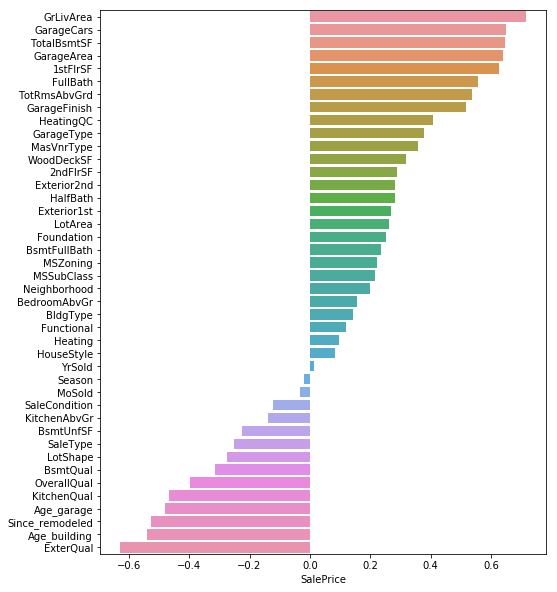

In [214]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
corr_val = corr.sort_values('SalePrice', ascending=False)
plt.figure(figsize=(8,10))
sns.barplot( corr_val.SalePrice[1:], corr_val.index[1:], orient='h')
plt.show()

In [215]:
y=df1['SalePrice'].values

In [216]:
df1=df1.drop('SalePrice', axis=1)





In [217]:
X=df1.values

In [218]:
from sklearn.ensemble import RandomForestRegressor
RFR1 = RandomForestRegressor(random_state=42)



In [220]:
45/3

15.0

In [221]:
from sklearn.model_selection import GridSearchCV

parameters ={'n_estimators':[100, 150, 200, 250], 'min_samples_split':[2, 3, 4, 5], 'min_samples_leaf':[1, 2, 3], 'max_features':[15, 16, 17]}

In [222]:
# from sklearn.model_selection import StratifiedKFold
# skf = StratifiedKFold(n_splits=10, random_state=7425, shuffle=True)


In [223]:

from sklearn.metrics import mean_squared_error

# neg_mse = lambda y1, y2: -mean_squared_error(y1, y2)


clf_rfr = GridSearchCV(RFR1, parameters, scoring='neg_mean_squared_error', cv=10)

In [224]:
clf_rfr.fit(X, y)#run at 1:12 pm on 9th Jan. end at 1:42

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_split': [2, 3, 4, 5], 'min_samples_leaf': [1, 2, 3], 'n_estimators': [100, 150, 200, 250], 'max_features': [15, 16, 17]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [227]:
clf_rfr.best_score_

-677395982.701612

In [70]:
import pandas as pd
import numpy as np

def get_corrs(df):
    col_correlations = df.corr()
    col_correlations.loc[:, :] = np.tril(col_correlations, k=-1)
    cor_pairs = col_correlations.stack()
    return cor_pairs.to_dict()


In [71]:
my_corrs = get_corrs(df1)

In [73]:
#print(my_corrs[('SalePrice',col_name)])